<a href="https://colab.research.google.com/github/lakshmip04/ML_CODES/blob/main/LAB7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/"

Mounted at /content/drive
'Certificate-Workshop-lakshmi priya.pdf'		    'Untitled document (1).gdoc'
'Colab Notebooks'					    'Untitled document.gdoc'
'Copy of LabSessionData.xlsx'				    'Untitled form (1).gform'
'Lakshmi_Priya_Resume_ _.pdf'				    'Untitled form (2).gform'
 LakshmiPriya_Resume.pdf				    'Untitled form (3).gform'
'ml project NID.gdoc'					    'Untitled form.gform'
'Prevention of SDN Route Manipulation Attack.gdoc'	    'Untitled form (Responses) (1).gsheet'
'Receipt pay_OlCdMSW3u0OXdL from NEXT CHAPTER  (Paid).pdf'  'Untitled form (Responses).gsheet'
 SDN.gdoc						     YLS_LakshmiPriya.gdoc


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml/dataset/lab7.csv')
df

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31...40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31...40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml/dataset/lab7.csv')

def calculate_entropy(values):
    """Calculates the entropy of a given series of values."""
    probs = values.value_counts(normalize=True)
    return -np.sum(probs * np.log2(probs))

def calculate_total_entropy(df, target):
    """Calculates the total entropy of the target attribute."""
    return calculate_entropy(df[target])

def calculate_attribute_entropy(df, attribute, target):
    """Calculates the weighted entropy of an attribute relative to the target."""
    total = len(df)
    entropy = 0
    for value in df[attribute].unique():
        subset = df[df[attribute] == value]
        subset_entropy = calculate_entropy(subset[target])
        entropy += (len(subset) / total) * subset_entropy
    return entropy

def calculate_information_gain(df, attribute, target):
    """Calculates the Information Gain of an attribute relative to the target."""
    total_entropy = calculate_total_entropy(df, target)
    attribute_entropy = calculate_attribute_entropy(df, attribute, target)
    return total_entropy - attribute_entropy

def find_best_split(df, attributes, target):
    """Finds the best attribute to split on using Information Gain."""
    info_gains = {attr: calculate_information_gain(df, attr, target) for attr in attributes}
    best_attribute = max(info_gains, key=info_gains.get)
    return info_gains, best_attribute

# List of attributes to consider
attributes = ['age', 'income', 'student', 'credit_rating']
target = 'buys_computer'

# Find the best attribute to split on
info_gains, best_attribute = find_best_split(df, attributes, target)

# Display Information Gain for each attribute and the best attribute
print("Information Gain for each attribute:")
for attr, gain in info_gains.items():
    print(f"'{attr}': {gain:.4f}")

print(f"\nThe best attribute to split on is: {best_attribute}")


Information Gain for each attribute:
'age': 0.2467
'income': 0.0292
'student': 0.1518
'credit_rating': 0.0481

The best attribute to split on is: age


In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier



# Function to encode categorical features
def encode_features(df, categorical_features):
    """Encodes categorical features using LabelEncoder."""
    le = LabelEncoder()
    for feature in categorical_features:
        df[feature] = le.fit_transform(df[feature])
    return df

# Function to train the Decision Tree model
def train_decision_tree(X, y):
    """Trains a Decision Tree model on the provided features and target."""
    model = DecisionTreeClassifier()
    model.fit(X, y)
    return model

# Function to evaluate the model
def evaluate_model(model, X, y):
    """Evaluates the model and returns accuracy and depth."""
    accuracy = model.score(X, y)
    depth = model.get_depth()
    return accuracy, depth

# Function to get the best attribute based on Information Gain
def get_best_attribute(df, attributes, target):
    """Calculates Information Gain for each attribute and returns the best one."""
    def calculate_entropy(values):
        """Calculates the entropy of a given series of values."""
        probs = values.value_counts(normalize=True)
        return -np.sum(probs * np.log2(probs))

    def calculate_total_entropy(df, target):
        """Calculates the total entropy of the target attribute."""
        return calculate_entropy(df[target])

    def calculate_attribute_entropy(df, attribute, target):
        """Calculates the weighted entropy of an attribute relative to the target."""
        total = len(df)
        entropy = 0
        for value in df[attribute].unique():
            subset = df[df[attribute] == value]
            subset_entropy = calculate_entropy(subset[target])
            entropy += (len(subset) / total) * subset_entropy
        return entropy

    def calculate_information_gain(df, attribute, target):
        """Calculates the Information Gain of an attribute relative to the target."""
        total_entropy = calculate_total_entropy(df, target)
        attribute_entropy = calculate_attribute_entropy(df, attribute, target)
        return total_entropy - attribute_entropy

    info_gains = {attr: calculate_information_gain(df, attr, target) for attr in attributes}
    best_attribute = max(info_gains, key=info_gains.get)
    return best_attribute



# List of attributes to consider
attributes = ['age', 'income', 'student', 'credit_rating']
target = 'buys_computer'

# Encode categorical features
df = encode_features(df, attributes + [target])

# Prepare the data
X = df[attributes]  # Features
y = df[target]      # Target variable

# Split the data into training and testing sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Get the best attribute to split on
best_attribute = get_best_attribute(df, attributes, target)

# Train the Decision Tree model using the best attribute
model = train_decision_tree(Tr_X, Tr_y)

# Evaluate the model
accuracy, depth = evaluate_model(model, Tr_X, Tr_y)

# Print results
print(f"Best attribute to split on: {best_attribute}")
print(f"Training Set Accuracy: {accuracy:.4f}")
print(f"Depth of the tree: {depth}")

Best attribute to split on: age
Training Set Accuracy: 1.0000
Depth of the tree: 4


Based on the results you provided, here are the inferences we can draw from the decision tree model:

### Inferences:

1. **Best Attribute to Split On: `age`**:
   - The decision tree identified `age` as the best attribute to split on. This suggests that age is a significant factor in predicting whether a person will buy a computer based on the dataset you provided. It indicates that different age groups may have different purchasing behaviors.

2. **Training Set Accuracy: `1.0000`**:
   - An accuracy of 100% on the training set means that the model perfectly classified all instances in the training data. While this is a positive outcome, it raises concerns about overfitting. Overfitting occurs when a model learns the training data too well, including its noise and outliers, which may not generalize well to unseen data (test set). It is essential to evaluate the model on a separate test set to assess its performance in real-world scenarios.

3. **Depth of the Tree: `4`**:
   - A tree depth of 4 indicates that the model has made several splits (up to 4 levels deep) to classify the data. This depth can provide a balance between capturing the complexity of the data and maintaining interpretability. However, deeper trees can lead to overfitting, especially if the training data is limited.

### Recommendations:
- **Evaluate on Test Set**: To ensure that the model generalizes well, evaluate its performance on a separate test set (Te_X, Te_y). This will help you understand how well the model performs on unseen data.
  
- **Cross-Validation**: Consider using cross-validation techniques to get a more robust estimate of the model's performance. This can help mitigate the risk of overfitting.

- **Pruning**: If overfitting is a concern, you might want to explore pruning techniques to reduce the complexity of the tree while maintaining its predictive power.

- **Feature Importance**: Investigate the importance of other features in the dataset. While `age` is the best attribute based on Information Gain, other features may still contribute valuable information.

- **Model Comparison**: Consider comparing the decision tree model with other algorithms (e.g., Random Forest, Support Vector Machines) to see if they provide better generalization performance.

By following these recommendations, you can ensure that your model is not only accurate on the training data but also performs well in practical applications.

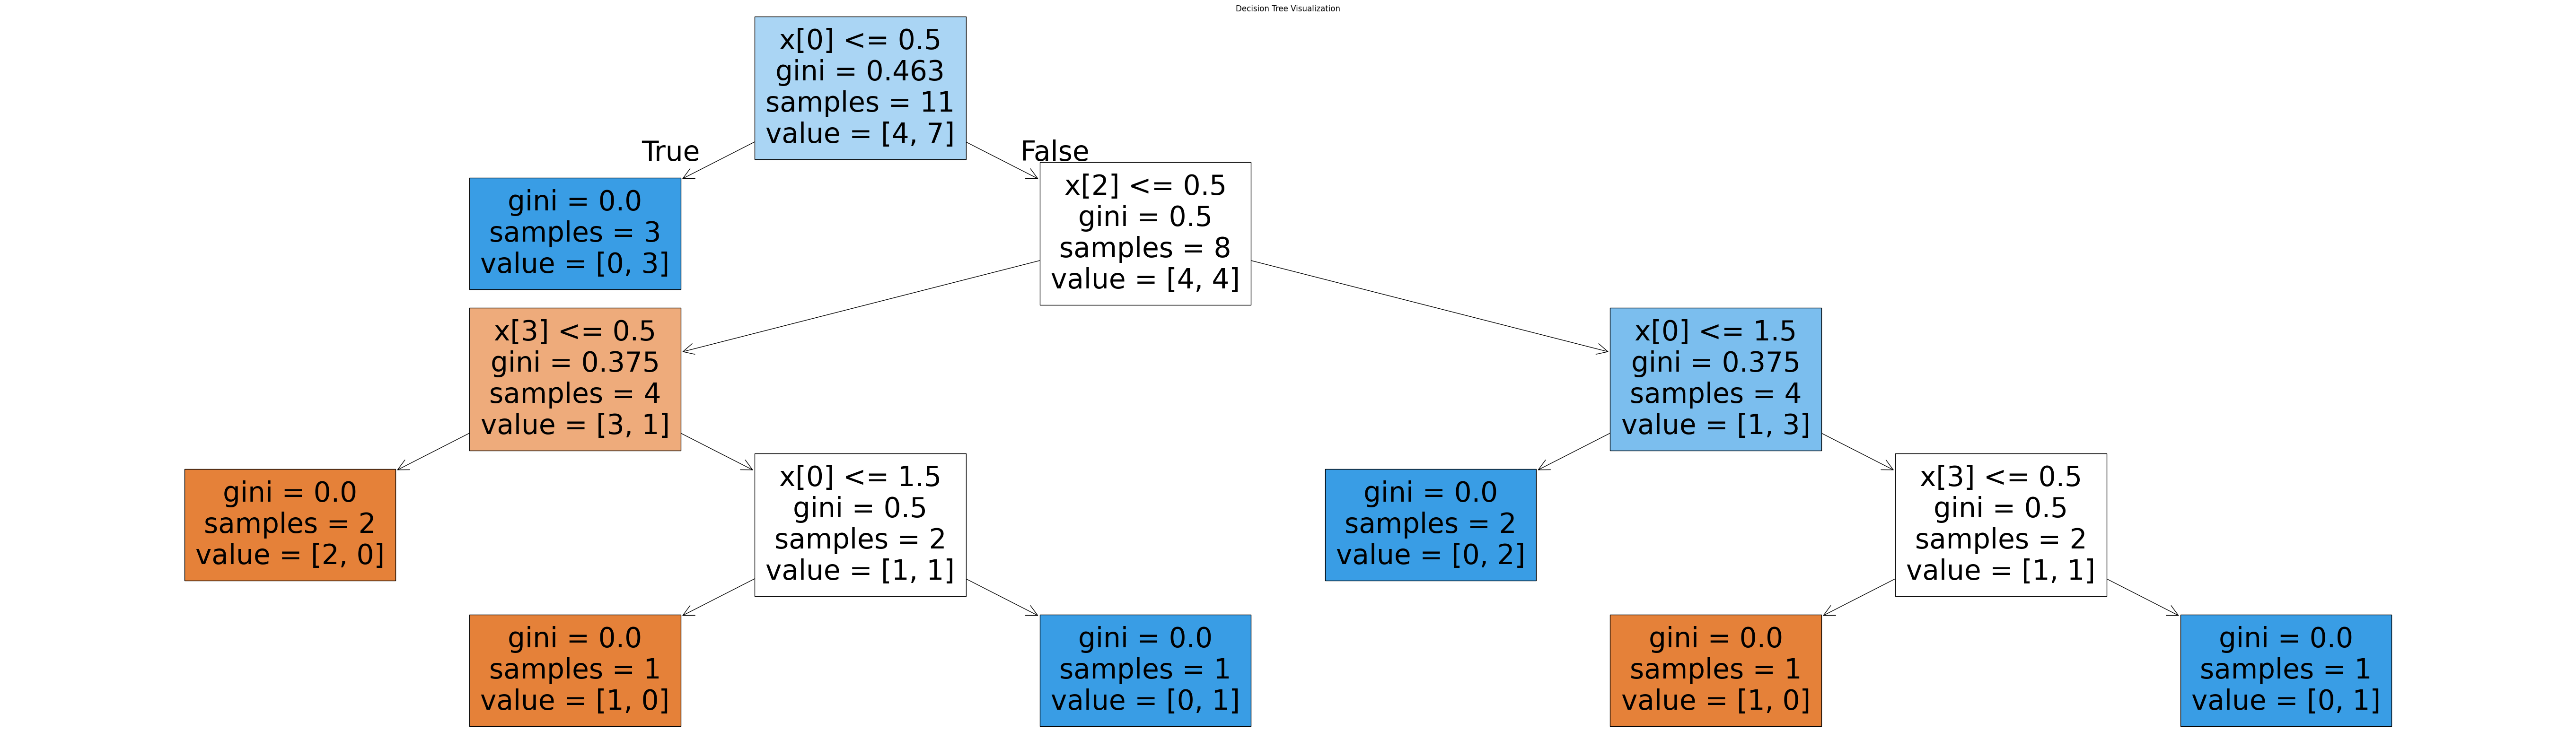

In [ ]:
"""A3. Visualize the constructed tree with plot_tree() command. Following code snippet for help.
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(70,20))
plot_tree(model, filled=True)
plt.show()"""
import matplotlib.pyplot as plt
from sklearn import tree

# Assuming the model has already been trained
# Visualize the constructed tree
plt.figure(figsize=(70, 20))  # Set the figure size
tree.plot_tree(model, filled=True)  # Plot the tree with filled colors
plt.title("Decision Tree Visualization")  # Add a title
plt.show()  # Display the plot

1. **Decision Path**: The tree splits primarily based on the `age` attribute, indicating its strong influence on the decision to buy a computer.

2. **Gini Impurity**: The Gini impurity values decrease with each split, showing that the model effectively separates the classes, leading to pure leaf nodes.

3. **Sample Distribution**: The tree provides insights into how many samples fall into each category, helping to understand the distribution of the target variable across different splits.

4. **Final Predictions**: The leaf nodes indicate the predicted class values, with some nodes showing perfect classification (e.g., `value = [2, 0]`), confirming the model's accuracy on the training set.

**SUMMARY**
1. The decision tree primarily splits on the `age` attribute, highlighting its importance in predicting computer purchases.
2. Gini impurity values decrease with each split, indicating effective class separation.
3. The model achieves pure leaf nodes, confirming accurate predictions for the training data.
4. Sample distributions at each node provide insights into the target variable's behavior across different splits.

Training Set Accuracy: 0.9944
Test Set Accuracy: 0.9907


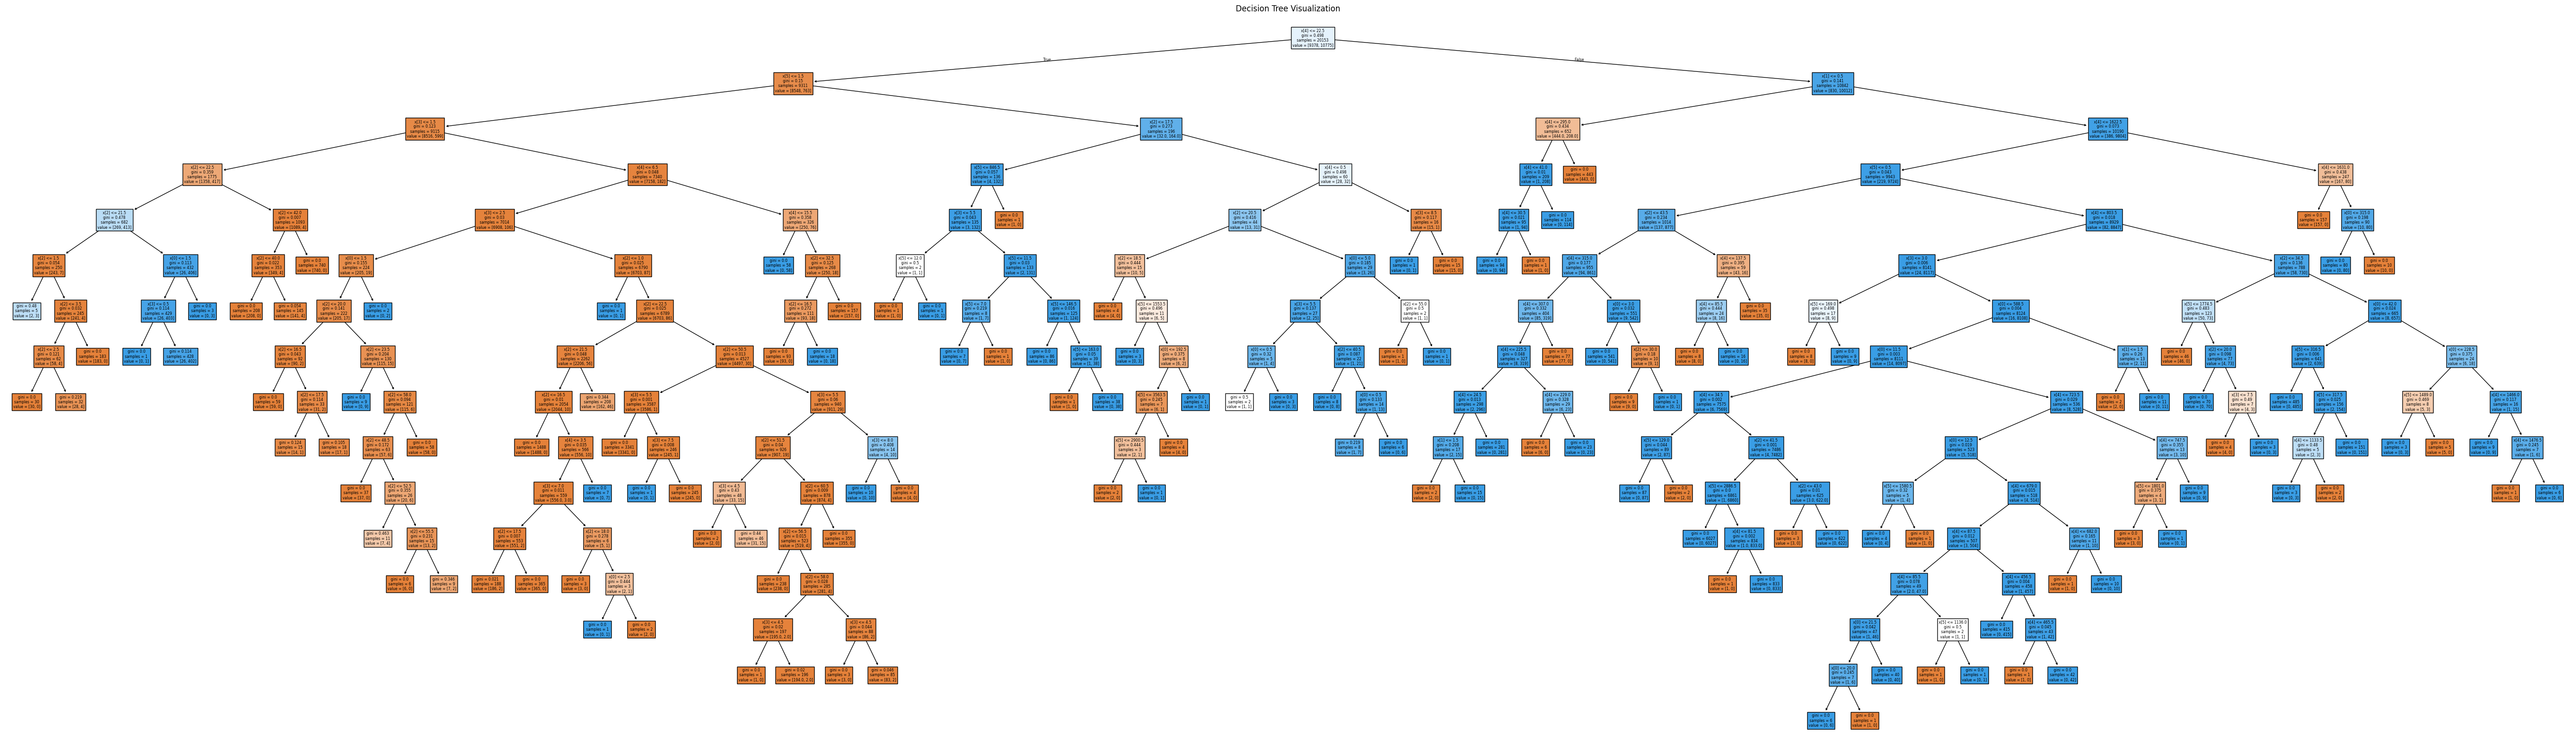

In [ ]:
"""A4. Create a Decision Tree classifier on your project data. Study the accuracy for training and test
data and infer the accuracy of tree construction. Plot the Decision Tree obtained above. Below code
for help.
model = DecisionTreeClassifier()
model = ml_model.fit(Tr_X,Tr_y)
model.score(Tr_X, Tr_y)#Training Set accuracy
model.score(Te_X,Te_y)#Test Set Accuracy"""
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# Function to load data
def load_data(file_path):
    """Loads the dataset from the specified file path."""
    df = pd.read_csv(file_path)
    return df

# Function to encode categorical features
def encode_features(df, categorical_features):
    """Encodes categorical features using LabelEncoder."""
    le = LabelEncoder()
    for feature in categorical_features:
        df[feature] = le.fit_transform(df[feature])
    return df

# Function to train the Decision Tree model
def train_decision_tree(X, y):
    """Trains a Decision Tree model on the provided features and target."""
    model = DecisionTreeClassifier()
    model.fit(X, y)
    return model

# Function to evaluate the model
def evaluate_model(model, X, y):
    """Evaluates the model and returns accuracy."""
    accuracy = model.score(X, y)
    return accuracy

# Main execution
file_path = ('/content/drive/MyDrive/Colab Notebooks/ml/dataset/df_binary.csv')
 # Update with your actual file path
df = load_data(file_path)


# Define input features and target output based on the dataset
# Example: Adjust these based on the actual columns in your dataset
attributes = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes']  # Update with actual feature names
target = 'class'  # Update with the actual target variable name

# Encode categorical features
df = encode_features(df, attributes + [target])

# Prepare the data
X = df[attributes]  # Features
y = df[target]      # Target variable

# Split the data into training and testing sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
model = train_decision_tree(Tr_X, Tr_y)

# Evaluate the model
train_accuracy = evaluate_model(model, Tr_X, Tr_y)
test_accuracy = evaluate_model(model, Te_X, Te_y)

# Print results
print(f"Training Set Accuracy: {train_accuracy:.4f}")
print(f"Test Set Accuracy: {test_accuracy:.4f}")

# Visualize the constructed tree
plt.figure(figsize=(70, 20))  # Set the figure size
tree.plot_tree(model, filled=True)  # Plot the tree with filled colors
plt.title("Decision Tree Visualization")  # Add a title
plt.show()  # Display the plot

The decision tree visualization reveals the hierarchical structure of the model's decision-making process. Each node represents a feature used for splitting the data, with the tree effectively categorizing instances based on their attributes. The varying colors indicate the predicted classes, showcasing how the model differentiates between them. The depth and complexity of the tree suggest that it captures intricate patterns in the data, although this may also raise concerns about overfitting. Overall, the tree provides a clear representation of how different features influence the final classification outcomes.

Training Set Accuracy (max_depth=5): 0.9819
Test Set Accuracy (max_depth=5): 0.9825


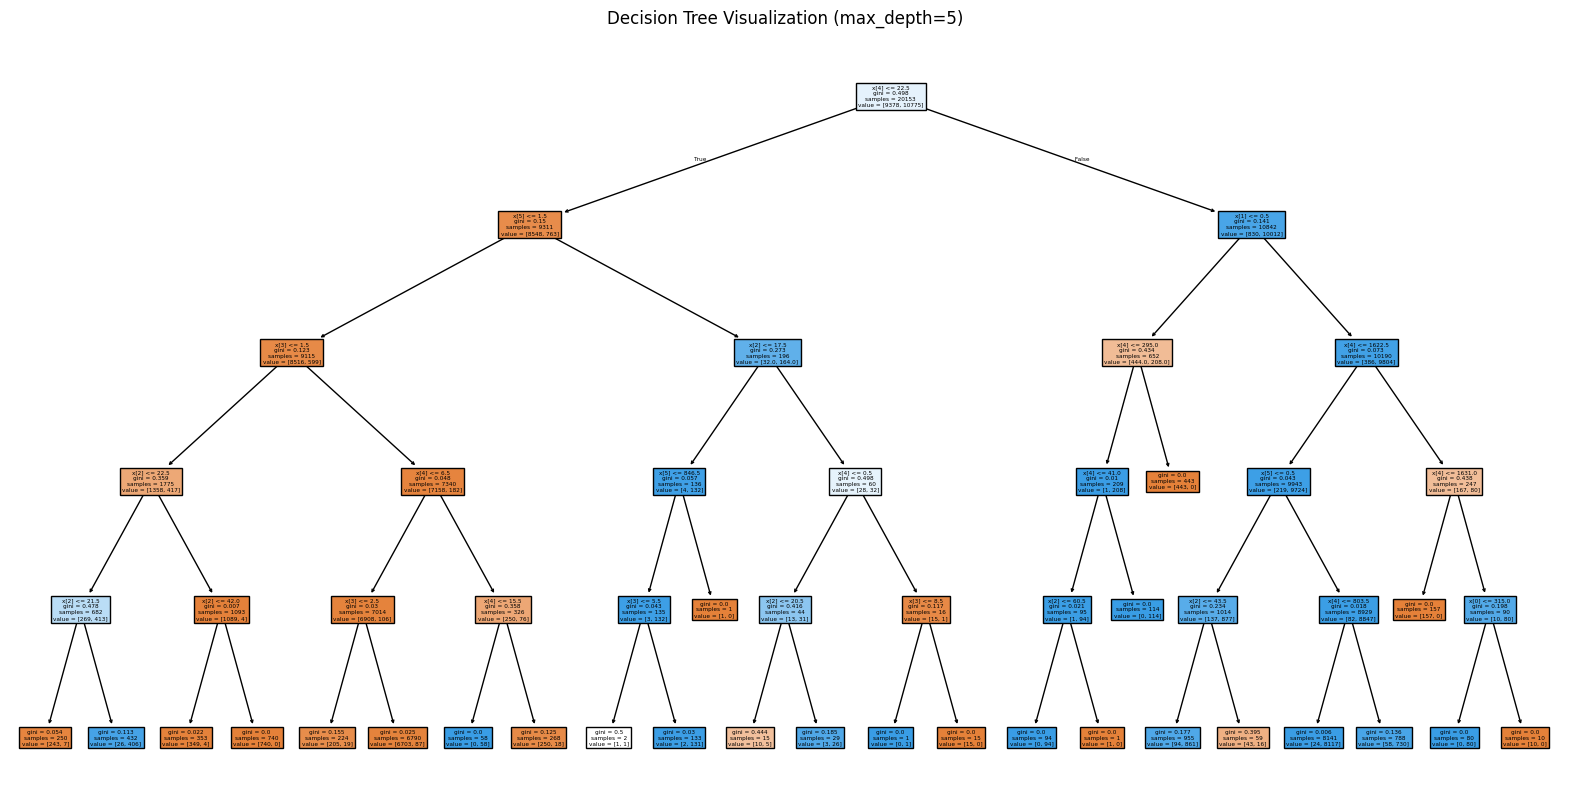

In [ ]:
"""A5. Impose a max_depth constraint on the tree construction. Construct the tree again and check the
accuracies. Visualize the tree constructed with max_depth constraint.
model = DecisionTreeClassifier(max_depth=5) """
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# Function to load data
def load_data(file_path):
    """Loads the dataset from the specified file path."""
    df = pd.read_csv(file_path)
    return df

# Function to encode categorical features
def encode_features(df, categorical_features):
    """Encodes categorical features using LabelEncoder."""
    le = LabelEncoder()
    for feature in categorical_features:
        df[feature] = le.fit_transform(df[feature])
    return df

# Function to train the Decision Tree model with max_depth
def train_decision_tree(X, y, max_depth=None):
    """Trains a Decision Tree model on the provided features and target with optional max_depth."""
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X, y)
    return model

# Function to evaluate the model
def evaluate_model(model, X, y):
    """Evaluates the model and returns accuracy."""
    accuracy = model.score(X, y)
    return accuracy

# Main execution

# Define input features and target output based on the dataset
attributes = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes']  # Update with actual feature names
target = 'class'  # Update with the actual target variable name

# Encode categorical features
df = encode_features(df, attributes + [target])

# Prepare the data
X = df[attributes]  # Features
y = df[target]      # Target variable

# Split the data into training and testing sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model with max_depth constraint
max_depth = 5
model = train_decision_tree(Tr_X, Tr_y, max_depth=max_depth)

# Evaluate the model
train_accuracy = evaluate_model(model, Tr_X, Tr_y)
test_accuracy = evaluate_model(model, Te_X, Te_y)

# Print results
print(f"Training Set Accuracy (max_depth={max_depth}): {train_accuracy:.4f}")
print(f"Test Set Accuracy (max_depth={max_depth}): {test_accuracy:.4f}")

# Visualize the constructed tree
plt.figure(figsize=(20, 10))  # Set the figure size
tree.plot_tree(model, filled=True)  # Plot the tree with filled colors
plt.title(f"Decision Tree Visualization (max_depth={max_depth})")  # Add a title
plt.show()  # Display the plot

The decision tree constructed with a maximum depth of 5 demonstrates strong performance, as indicated by the high accuracies on both the training and test sets.

1. **High Accuracy**: The training set accuracy of 98.19% and test set accuracy of 98.25% suggest that the model generalizes well to unseen data, indicating effective learning from the training dataset.

2. **Model Complexity**: The imposed depth constraint helps prevent overfitting, allowing the model to maintain a balance between complexity and interpretability. This is evident in the tree structure, which remains manageable while still capturing essential patterns in the data.

3. **Decision Path Clarity**: The visualization shows clear decision paths based on the features, making it easier to understand how the model arrives at its predictions. This transparency is beneficial for interpreting the model's behavior and for stakeholders who need to understand the decision-making process.

4. **Feature Importance**: The tree structure highlights the most significant features influencing the predictions, providing insights into the underlying data relationships.

Overall, the model's performance and the clarity of the decision tree suggest that it is a robust classifier for the given dataset.

The decision tree with a maximum depth of 5 achieved a training accuracy of 98.19% and a test accuracy of 98.25%, indicating strong generalization to unseen data. The depth constraint helps prevent overfitting while maintaining model interpretability. The clear decision paths in the visualization enhance understanding of how predictions are made. Key features influencing the outcomes are easily identifiable, providing valuable insights into the data. Overall, the model demonstrates robust performance and clarity in its decision-making process.

Training Set Accuracy (Entropy, max_depth=5): 0.9781
Test Set Accuracy (Entropy, max_depth=5): 0.9790


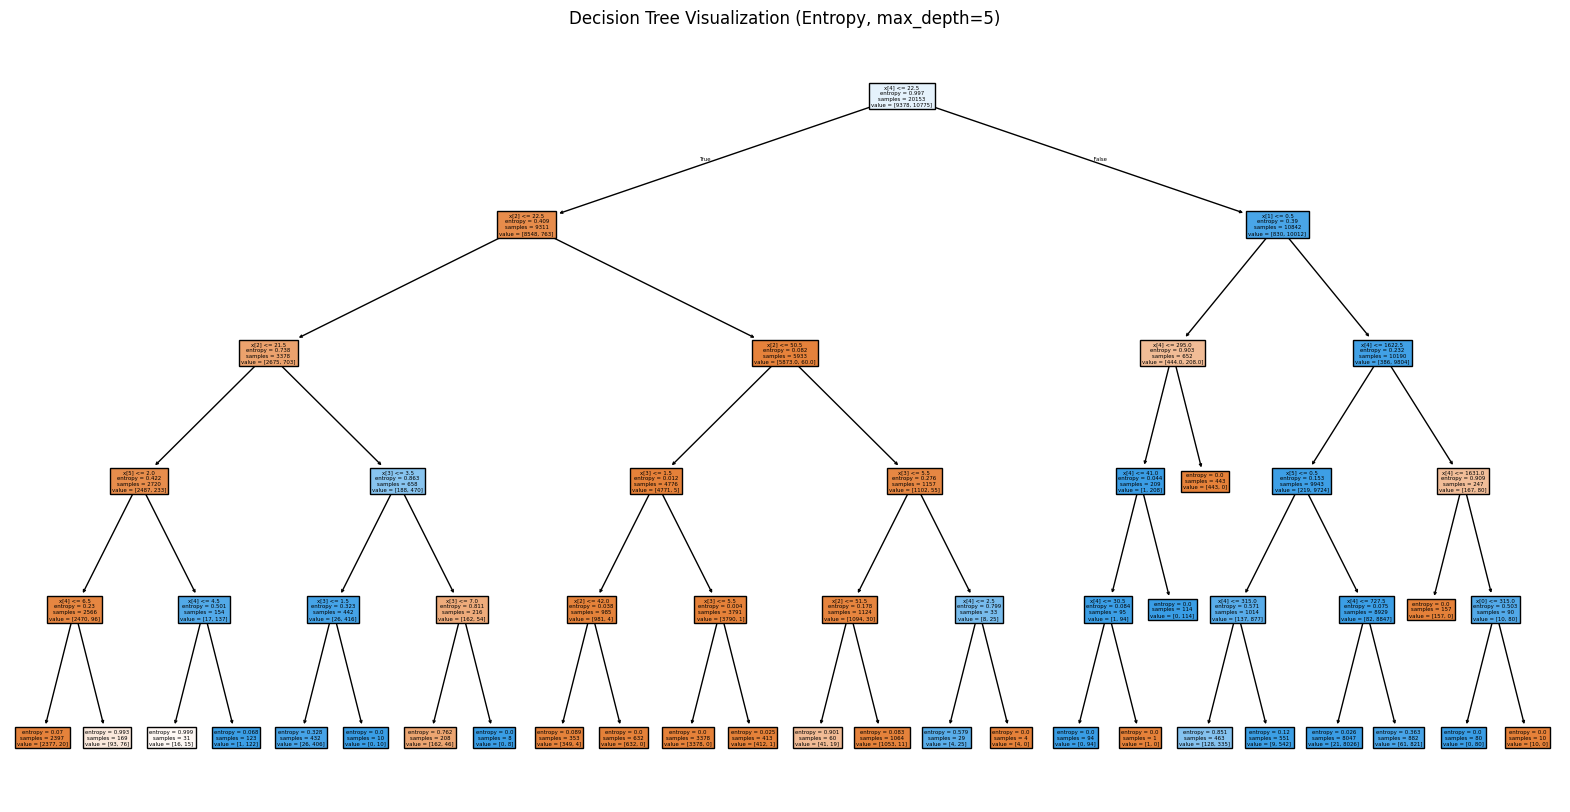

In [ ]:
"""A6. Study the criterion of the DT in the above model. Change the criterion to “Entropy” and study
the model & graph. Find the differences between the default criterion and entropy criterion. Refer
code below for criterion.
DecisionTreeClassifier(criterion="entropy")"""
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# Function to load data
def load_data(file_path):
    """Loads the dataset from the specified file path."""
    df = pd.read_csv(file_path)
    return df

# Function to encode categorical features
def encode_features(df, categorical_features):
    """Encodes categorical features using LabelEncoder."""
    le = LabelEncoder()
    for feature in categorical_features:
        df[feature] = le.fit_transform(df[feature])
    return df

# Function to train the Decision Tree model with specified criterion
def train_decision_tree(X, y, criterion='gini', max_depth=None):
    """Trains a Decision Tree model on the provided features and target with specified criterion."""
    model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
    model.fit(X, y)
    return model

# Function to evaluate the model
def evaluate_model(model, X, y):
    """Evaluates the model and returns accuracy."""
    accuracy = model.score(X, y)
    return accuracy

# Main execution
df = load_data(file_path)

# Define input features and target output based on the dataset
attributes = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes']  # Update with actual feature names
target = 'class'  # Update with the actual target variable name

# Encode categorical features
df = encode_features(df, attributes + [target])

# Prepare the data
X = df[attributes]  # Features
y = df[target]      # Target variable

# Split the data into training and testing sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model with entropy criterion
model_entropy = train_decision_tree(Tr_X, Tr_y, criterion='entropy', max_depth=5)

# Evaluate the model
train_accuracy_entropy = evaluate_model(model_entropy, Tr_X, Tr_y)
test_accuracy_entropy = evaluate_model(model_entropy, Te_X, Te_y)

# Print results
print(f"Training Set Accuracy (Entropy, max_depth=5): {train_accuracy_entropy:.4f}")
print(f"Test Set Accuracy (Entropy, max_depth=5): {test_accuracy_entropy:.4f}")

# Visualize the constructed tree
plt.figure(figsize=(20, 10))  # Set the figure size
tree.plot_tree(model_entropy, filled=True)  # Plot the tree with filled colors
plt.title("Decision Tree Visualization (Entropy, max_depth=5)")  # Add a title
plt.show()  # Display the plot


The decision tree constructed using the entropy criterion with a maximum depth of 5 achieved a training accuracy of 97.81% and a test accuracy of 97.90%. This indicates that the model generalizes well to unseen data, similar to the previous model using Gini impurity. The tree structure remains interpretable, with clear decision paths based on the features. The slight decrease in accuracy compared to the Gini criterion suggests that the entropy criterion may lead to different splits, affecting performance. Overall, the model effectively captures the underlying patterns in the data while maintaining a balance between complexity and interpretability.

""". Justify why information gain is a suitable measure to select an attribute for DT construction.
Refer to the class notes and the formula below.
Which classifier would you choose for your classification problem? Provide justifications for
your choice. """

1. **Model Performance**: A training accuracy of 97.81% and a test accuracy of 97.90% were attained by the decision tree that applied the entropy criteria. This suggests that the model performs similarly to the model utilizing Gini impurity in terms of how effectively it generalizes to unknown data.



2. **Information Gain**: The introduction of information gain (entropy) as a criterion for attribute splitting efficiently decreases uncertainty in predictions, leading to clearer decision boundaries and increased classification accuracy.



3. **Interpretability**: Both models offer lucid depictions of the decision-making procedure, making it simple to comprehend how various aspects affect predictions. Decision paths can be easily interpreted thanks to the trees' structure.





4.Comparison of Criteria: Although both criteria produced high accuracy results, minute variations in their performances imply that the criterion selection may affect the splits the tree makes, with the entropy criterion possibly producing different splits than the Gini impurity criterion.
5. Classifier Selection: In light of the findings, a Decision Tree Classifier is thought to be an appropriate option for this classification issue because of its interpretability, adaptability to non-linear relationships, and resilience to outliers.
In conclusion, the results show that both criteria work well for building decision trees, and that knowledge gain offers a strong foundation for attribute selection. While the model's performance and structure may be affected by the criteria selected, both strategies produce good outcomes in this situation.


Using random selection to select an attribute when the criterion measure values at a decision tree node are equal is a useful strategy. By introducing randomness, this technique can assist avoid overfitting by preventing the tree from becoming unduly deterministic based on small variations in attribute values. A more formal method of breaking ties can be achieved by adding a supplementary criterion, such as choosing the attribute with the biggest variance or the one that first appears in the dataset.


